# Creation of Samples

For a given couple of pipeline, we have 1000 group analyses. The function **voxel_concat** takes as input the parameter values for the first and the second pipeline, stores all the statistical values contained within the mask in a list for each of the 1000 group analyses, and returns a concatenation of the 1000 lists obtained.

Since the resulting list of voxels obtained is very large (more than 150M statistical values) and using it for further observations can be very time-consuming, for each between-group analysis using two given pipelines, on which we wanted to make observations, we only took a random sample of 1M values from the concatenation of statistical values over the 1000 corresponding group analyses. The function **save_sample** takes a vector and a file name as input and stores a random sample (fixed with a seed) within a .txt file.

To avoid having to execute *voxel_concat* (which can take a long time) each time we need to extract the sample values, and thus simplify the re-execution of the notebook, we will use a function **voxel_concat_sample**, which takes as input parameter values for both pipelines, uses *voxel_concat* and *save_sample* as auxiliary functions to create the random sample file only if it does not exists already, and reads and returns the file content when the file exists.

Functions **voxel_concat_fsl** and **voxel_concat_sample_fsl** were created to obtained the same results for analyses using FSL.

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib import rc

# activate latex text rendering
rc('text', usetex=True)

In [2]:
import statsmodels.api as sm 
import pylab as py

In [3]:
import nibabel as nib
import random

In [4]:
def voxel_concat_08(smooth1,reg1,der1,smooth2,reg2,der2):
    Vect_vox=[]
    smooth1=str(smooth1)
    smooth2=str(smooth2)
    reg1=str(reg1)
    reg2=str(reg2)
    der1=str(der1)
    der2=str(der2)
    for i in range(1000):
        fold='SLA'+str(i+1)+'_50_hand_0.8'
        V0 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'spmT_0001.nii')).get_data().flatten()
        V1 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'mask.nii')).get_data().flatten()
        V0bis=V0[V1!=0].tolist()
        Vect_vox=Vect_vox+V0bis
    return Vect_vox;

In [5]:
def save_sample(data,name):
    random.seed(0)
    data_sample=random.sample(data,1000000)
    
    sample_file = open(name+".txt","w")
    for i in range(1000000):
        sample_file.write(str(data_sample[i]))
        if i!=999999:
            sample_file.write(" \n")
    sample_file.close()

In [6]:
def voxel_concat_sample_08(smooth1,reg1,der1,smooth2,reg2,der2):
    
    if not(os.path.isfile('sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08.txt')):
        vect_vox1 = voxel_concat_08(smooth1,reg1,der1,smooth2,reg2,der2)
        save_sample(vect_vox1,'sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08')
        
    with open('sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08.txt',"r") as V0:
        filecontents=V0.readlines()
    Vect_vox_sample=[float(i) for i in filecontents]
    return Vect_vox_sample;

In [7]:
def voxel_concat_08_cov(smooth1,reg1,der1,smooth2,reg2,der2):
    Vect_vox=[]
    smooth1=str(smooth1)
    smooth2=str(smooth2)
    reg1=str(reg1)
    reg2=str(reg2)
    der1=str(der1)
    der2=str(der2)
    for i in range(1000):
        fold='SLA'+str(i+1)+'_50_hand_0.8_cov'
        V0 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'spmT_0001.nii')).get_data().flatten()
        V1 = nib.load(os.path.join('..', 'data',fold,'smooth_'+smooth1+'_'+smooth2,'reg_'+reg1+'_'+reg2,'der_'+der1+'_'+der2,'mask.nii')).get_data().flatten()
        V0bis=V0[V1!=0].tolist()
        Vect_vox=Vect_vox+V0bis
    return Vect_vox;

In [8]:
def voxel_concat_sample_08_cov(smooth1,reg1,der1,smooth2,reg2,der2):
    
    if not(os.path.isfile('sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08_cov.txt')):
        vect_vox1 = voxel_concat_08_cov(smooth1,reg1,der1,smooth2,reg2,der2)
        save_sample(vect_vox1,'sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08_cov')
        
    with open('sample_'+str(smooth1)+str(reg1)+str(der1)+'_'+str(smooth2)+str(reg2)+str(der2)+'_08_cov.txt',"r") as V0:
        filecontents=V0.readlines()
    Vect_vox_sample=[float(i) for i in filecontents]
    return Vect_vox_sample;

## Pairs of Pipelines

We defined samples for between-group analyses using two given pipelines, for multiple pairs of pipelines, both in SPM and FSL.

In [9]:
Vect_vox_5240_500_sample_08 = voxel_concat_sample_08(5,24,0,5,0,0);

In [10]:
Vect_vox_5240_500_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,0,0);

In [11]:
Vect_vox_5240_501_sample_08 = voxel_concat_sample_08(5,24,0,5,0,1);

In [12]:
Vect_vox_5240_501_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,0,1);

In [13]:
Vect_vox_5240_560_sample_08 = voxel_concat_sample_08(5,24,0,5,6,0);

In [14]:
Vect_vox_5240_560_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,6,0);

In [15]:
Vect_vox_5240_561_sample_08 = voxel_concat_sample_08(5,24,0,5,6,1);

In [16]:
Vect_vox_5240_561_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,6,1);

In [17]:
Vect_vox_5240_5240_sample_08 = voxel_concat_sample_08(5,24,0,5,24,0);

In [18]:
Vect_vox_5240_5240_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,24,0);

In [19]:
Vect_vox_5240_5241_sample_08 = voxel_concat_sample_08(5,24,0,5,24,1);

In [20]:
Vect_vox_5240_5241_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,5,24,1);

In [21]:
Vect_vox_5240_800_sample_08 = voxel_concat_sample_08(5,24,0,8,0,0);

In [22]:
Vect_vox_5240_800_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,0,0);

In [23]:
Vect_vox_5240_801_sample_08 = voxel_concat_sample_08(5,24,0,8,0,1);

In [24]:
Vect_vox_5240_801_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,0,1);

In [25]:
Vect_vox_5240_860_sample_08 = voxel_concat_sample_08(5,24,0,8,6,0);

In [26]:
Vect_vox_5240_860_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,6,0);

In [27]:
Vect_vox_5240_861_sample_08 = voxel_concat_sample_08(5,24,0,8,6,1);

In [28]:
Vect_vox_5240_861_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,6,1);

In [29]:
Vect_vox_5240_8240_sample_08 = voxel_concat_sample_08(5,24,0,8,24,0);

In [30]:
Vect_vox_5240_8240_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,24,0);

In [31]:
Vect_vox_5240_8241_sample_08 = voxel_concat_sample_08(5,24,0,8,24,1);

In [32]:
Vect_vox_5240_8241_sample_08_cov = voxel_concat_sample_08_cov(5,24,0,8,24,1);

# Observations on the Data

## Statistical Distributions

Distributions of the statistical values were observed for various between-group analyses, and compared to the the distribution associated to the Student law with $n=98$ degrees of freedom.

## Logarithmic P-P plots

For a given set of statistical values that is expected to follow a certain distribution, we can obtained the p-values associated to the statistical values $x_i$, which are to $1 - F(x_i)$ (where F is the distribution function).

Since the p-values are expected to follow a uniform distribution on $[0;1]$, for a set of $N$ statistical values, the $k^{th}$ ordered p-value is expected to be equal to $k/(N+1)$ (for our samples of 1000000 statistical values, $k/(1000001)$).

P-P plots are used to observe how a given set of statistical values diverge from an expected distribution by plotting, for each ordered statistical value, the expected associated p-value on the x-axis and the obtained p-value on the y-axis. Here we use variants fo P-P plots by replacing the p-values by the following:

-on the x-axis: $log_{10}$(expected p-value) instead of the expected p-value

-on the y-axis: $log_{10}$(obtained p-value) - $log_{10}$(expected p-value) instead of obtained p-value.

Doing so allows us to better observe what happens in the tail of our set of statistical values. Since we observe the $log_{10}$ values of the expected p-values, which go from $1/1000001$ to $1000000/1000001$, on the x-axis, the lowest and highest values on the x-axis are $-log_{10}(1000000/1000001) \approx 0$ and $-log_{10}(1/1000001) \approx 6$. For a given $k$, the $k$ lowest expected p-values on the x-axis are in the interval between $-log_{10}(k/1000001) \approx 6-log_{10}(k)$ and $-log_{10}(1/1000001) \approx 6$. Therefore, the logarithmic graph gives us a better observation of the behavior of the p-values around 0.

(Notably, since we plotted the confidence interval boundaries for the 10000 first p-values, it appears within the $[2,6]$ interval on the x-axis of the plot)

High statistical values (right tail of our sample) are associated to low p-values, i.e. to high $log_{10}$ of p-values. Statistical values in the tail are higher than expected when $log_{10}$(obtained p-value) - $log_{10}$(expected p-value) $> 0$, and lower when $log_{10}$(obtained p-value) - $log_{10}$(expected p-value) $< 0$.

# Results

## SPM

### P-P Plots

The P-P plots below are obtained for various between-group analyses with identical or different pipelines. Default parameter values for both pipelines are the following: 5mm for smoothing kernel FWHM value, 24 motion regressors and no temporal derivatives of the HRF in the GLM model). When not indicated, parameter values in both pipelines are equal to default values.

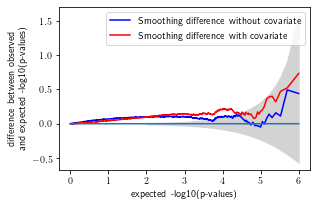

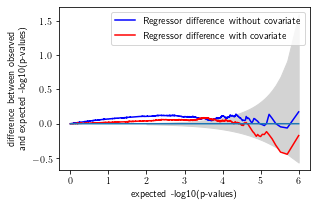

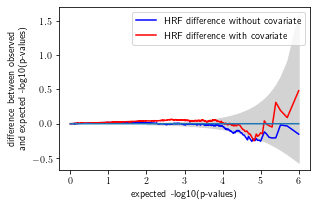

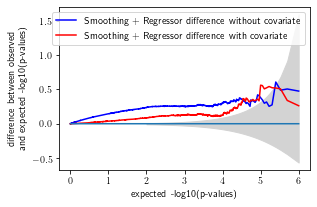

In [17]:
data1_1=Vect_vox_5240_8240_sample_08
data2_1=Vect_vox_5240_8240_sample_08_cov

data1_2=Vect_vox_5240_500_sample_08
data2_2=Vect_vox_5240_500_sample_08_cov

data1_3=Vect_vox_5240_5241_sample_08
data2_3=Vect_vox_5240_5241_sample_08_cov

data1_4=Vect_vox_5240_800_sample_08
data2_4=Vect_vox_5240_800_sample_08_cov


matplotlib.rc("text",usetex=True)
f,(ax1) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

n=len(data1_1)

dist = scipy.stats.t
beta = scipy.stats.beta
p_th = -np.log10([t/(n+1) for t in range(1,n+1)])
p_th_sub=-np.log10([t/(n+1) for t in range(1,10001)])    
    
conf_int_inf_1 = [-np.log10(beta.interval(0.95,i,n-i+1,loc=0,scale=1)[0])+np.log10(i/(n+1)) for i in range(1,10001)]
conf_int_sup_1 = [-np.log10(beta.interval(0.95,i,n-i+1,loc=0,scale=1)[1])+np.log10(i/(n+1)) for i in range(1,10001)]     

p_obs_1_1 = -np.log10(sorted(dist.sf(np.array(data1_1),98)))
p_obs_2_1 = -np.log10(sorted(dist.sf(np.array(data2_1),98)))
    
ba_diff_1_1 = [(p_obs_1_1[i] - p_th[i]) for i in range(n)]
ba_diff_2_1 = [(p_obs_2_1[i] - p_th[i]) for i in range(n)]

line1_1, = ax1.plot(p_th, ba_diff_1_1,'#0000FF')
line2_1, = ax1.plot(p_th, ba_diff_2_1,'#FF0000')
    
ax1.plot(p_th,n*[0],'-')
ax1.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax1.set_xlabel('expected -log10(p-values)')
ax1.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax1.legend([line1_1,line2_1],["Smoothing difference without covariate","Smoothing difference with covariate"])   

plt.show()

f.savefig("QQplotder1.pdf", bbox_inches='tight')


f,(ax2) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_2 = -np.log10(sorted(dist.sf(np.array(data1_2),98)))
p_obs_2_2 = -np.log10(sorted(dist.sf(np.array(data2_2),98)))
    
ba_diff_1_2 = [(p_obs_1_2[i] - p_th[i]) for i in range(n)]
ba_diff_2_2 = [(p_obs_2_2[i] - p_th[i]) for i in range(n)]

line1_2, = ax2.plot(p_th, ba_diff_1_2,'#0000FF')
line2_2, = ax2.plot(p_th, ba_diff_2_2,'#FF0000')
    
ax2.plot(p_th,n*[0],'-')
ax2.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax2.set_xlabel('expected -log10(p-values)')
ax2.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax2.legend([line1_2,line2_2],["Regressor difference without covariate","Regressor difference with covariate"])   

plt.show()

f.savefig("QQplotder2.pdf", bbox_inches='tight')


f,(ax3) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_3 = -np.log10(sorted(dist.sf(np.array(data1_3),98)))
p_obs_2_3 = -np.log10(sorted(dist.sf(np.array(data2_3),98)))
    
ba_diff_1_3 = [(p_obs_1_3[i] - p_th[i]) for i in range(n)]
ba_diff_2_3 = [(p_obs_2_3[i] - p_th[i]) for i in range(n)]

line1_3, = ax3.plot(p_th, ba_diff_1_3,'#0000FF')
line2_3, = ax3.plot(p_th, ba_diff_2_3,'#FF0000')
    
ax3.plot(p_th,n*[0],'-')
ax3.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax3.set_xlabel('expected -log10(p-values)')
ax3.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax3.legend([line1_3,line2_3],["HRF difference without covariate","HRF difference with covariate"])   

plt.show()

f.savefig("QQplotder2.pdf", bbox_inches='tight')


f,(ax4) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_4 = -np.log10(sorted(dist.sf(np.array(data1_4),98)))
p_obs_2_4 = -np.log10(sorted(dist.sf(np.array(data2_4),98)))
    
ba_diff_1_4 = [(p_obs_1_4[i] - p_th[i]) for i in range(n)]
ba_diff_2_4 = [(p_obs_2_4[i] - p_th[i]) for i in range(n)]

line1_4, = ax4.plot(p_th, ba_diff_1_4,'#0000FF')
line2_4, = ax4.plot(p_th, ba_diff_2_4,'#FF0000')
    
ax4.plot(p_th,n*[0],'-')
ax4.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax4.set_xlabel('expected -log10(p-values)')
ax4.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax4.legend([line1_4,line2_4],["Smoothing + Regressor difference without covariate","Smoothing + Regressor difference with covariate"])   

plt.show()

f.savefig("QQplotder2.pdf", bbox_inches='tight')

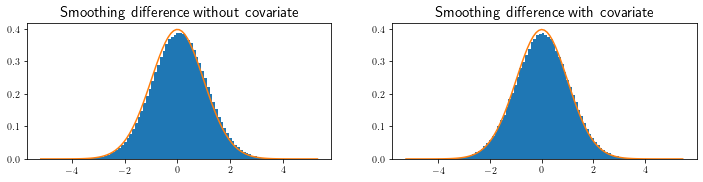

In [21]:
data1=Vect_vox_5240_8240_sample_08
data2=Vect_vox_5240_8240_sample_08_cov
f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(12,2.5))

dist = scipy.stats.t
matplotlib.rc("text",usetex=True)

n1, bins1, patches1 = ax1.hist(np.array(data1),100,density=True)
y1=dist.pdf(bins1,98)
ax1.plot(bins1, y1, '-')
ax1.set_title("Smoothing difference without covariate",fontsize=15)
n2, bins2, patches2 = ax2.hist(np.array(data2),100,density=True)
y2=dist.pdf(bins2,98)
ax2.plot(bins2, y2, '-')
ax2.set_title("Smoothing difference with covariate",fontsize=15)
plt.show()

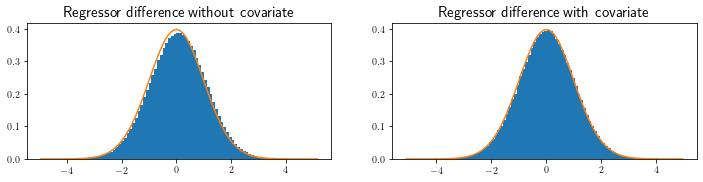

In [22]:
data1=Vect_vox_5240_500_sample_08
data2=Vect_vox_5240_500_sample_08_cov
f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(12,2.5))

dist = scipy.stats.t
matplotlib.rc("text",usetex=True)

n1, bins1, patches1 = ax1.hist(np.array(data1),100,density=True)
y1=dist.pdf(bins1,98)
ax1.plot(bins1, y1, '-')
ax1.set_title("Regressor difference without covariate",fontsize=15)
n2, bins2, patches2 = ax2.hist(np.array(data2),100,density=True)
y2=dist.pdf(bins2,98)
ax2.plot(bins2, y2, '-')
ax2.set_title("Regressor difference with covariate",fontsize=15)
plt.show()

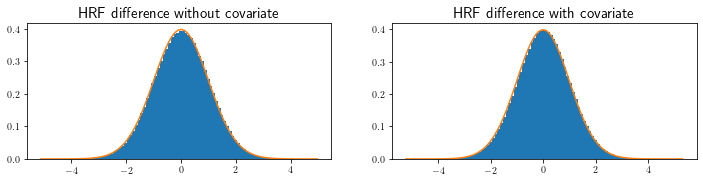

In [23]:
data1=Vect_vox_5240_5241_sample_08
data2=Vect_vox_5240_5241_sample_08_cov
f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(12,2.5))

dist = scipy.stats.t
matplotlib.rc("text",usetex=True)

n1, bins1, patches1 = ax1.hist(np.array(data1),100,density=True)
y1=dist.pdf(bins1,98)
ax1.plot(bins1, y1, '-')
ax1.set_title("HRF difference without covariate",fontsize=15)
n2, bins2, patches2 = ax2.hist(np.array(data2),100,density=True)
y2=dist.pdf(bins2,98)
ax2.plot(bins2, y2, '-')
ax2.set_title("HRF difference with covariate",fontsize=15)
plt.show()

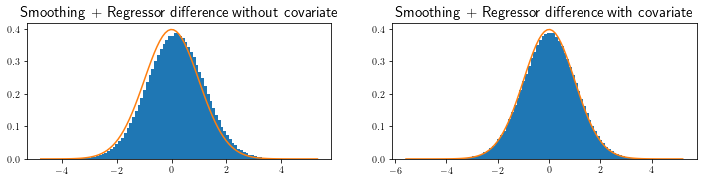

In [24]:
data1=Vect_vox_5240_800_sample_08
data2=Vect_vox_5240_800_sample_08_cov
f,(ax1,ax2) = plt.subplots(1,2,sharey=False,figsize=(12,2.5))

dist = scipy.stats.t
matplotlib.rc("text",usetex=True)

n1, bins1, patches1 = ax1.hist(np.array(data1),100,density=True)
y1=dist.pdf(bins1,98)
ax1.plot(bins1, y1, '-')
ax1.set_title("Smoothing + Regressor difference without covariate",fontsize=15)
n2, bins2, patches2 = ax2.hist(np.array(data2),100,density=True)
y2=dist.pdf(bins2,98)
ax2.plot(bins2, y2, '-')
ax2.set_title("Smoothing + Regressor difference with covariate",fontsize=15)
plt.show()

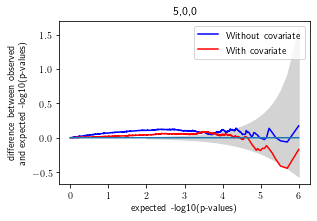

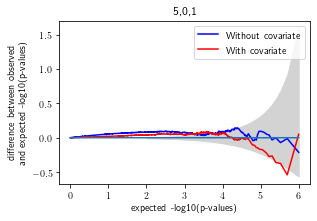

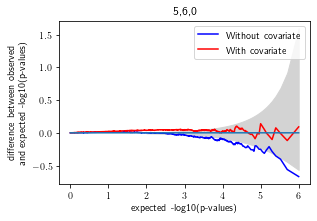

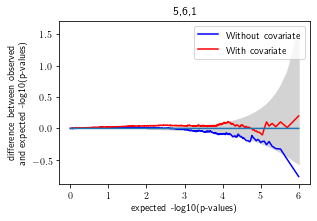

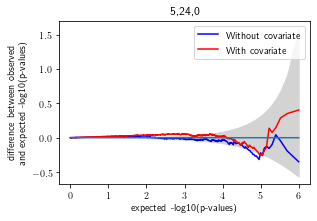

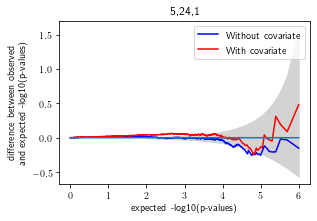

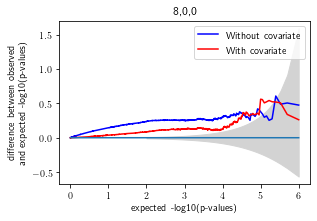

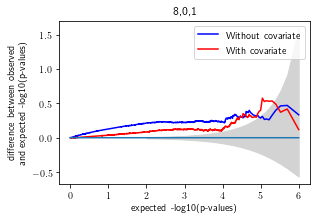

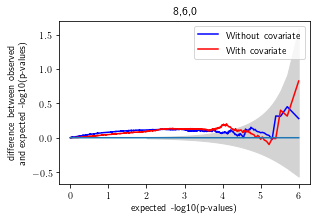

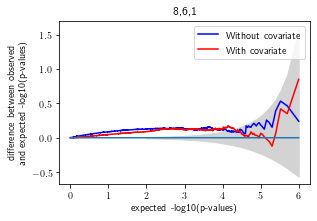

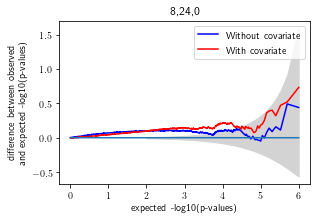

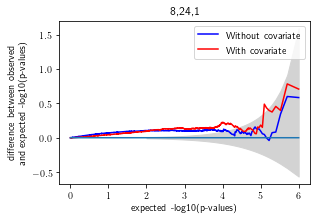

In [33]:
data1_1=Vect_vox_5240_500_sample_08
data2_1=Vect_vox_5240_500_sample_08_cov

data1_2=Vect_vox_5240_501_sample_08
data2_2=Vect_vox_5240_501_sample_08_cov

data1_3=Vect_vox_5240_560_sample_08
data2_3=Vect_vox_5240_560_sample_08_cov

data1_4=Vect_vox_5240_561_sample_08
data2_4=Vect_vox_5240_561_sample_08_cov

data1_5=Vect_vox_5240_5240_sample_08
data2_5=Vect_vox_5240_5240_sample_08_cov

data1_6=Vect_vox_5240_5241_sample_08
data2_6=Vect_vox_5240_5241_sample_08_cov

data1_7=Vect_vox_5240_800_sample_08
data2_7=Vect_vox_5240_800_sample_08_cov

data1_8=Vect_vox_5240_801_sample_08
data2_8=Vect_vox_5240_801_sample_08_cov

data1_9=Vect_vox_5240_860_sample_08
data2_9=Vect_vox_5240_860_sample_08_cov

data1_10=Vect_vox_5240_861_sample_08
data2_10=Vect_vox_5240_861_sample_08_cov

data1_11=Vect_vox_5240_8240_sample_08
data2_11=Vect_vox_5240_8240_sample_08_cov

data1_12=Vect_vox_5240_8241_sample_08
data2_12=Vect_vox_5240_8241_sample_08_cov


matplotlib.rc("text",usetex=True)

f,(ax1) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

n=len(data1_1)

dist = scipy.stats.t
beta = scipy.stats.beta
p_th = -np.log10([t/(n+1) for t in range(1,n+1)])
p_th_sub=-np.log10([t/(n+1) for t in range(1,10001)])    
    
conf_int_inf_1 = [-np.log10(beta.interval(0.95,i,n-i+1,loc=0,scale=1)[0])+np.log10(i/(n+1)) for i in range(1,10001)]
conf_int_sup_1 = [-np.log10(beta.interval(0.95,i,n-i+1,loc=0,scale=1)[1])+np.log10(i/(n+1)) for i in range(1,10001)]     

p_obs_1_1 = -np.log10(sorted(dist.sf(np.array(data1_1),98)))
p_obs_2_1 = -np.log10(sorted(dist.sf(np.array(data2_1),98)))
    
ba_diff_1_1 = [(p_obs_1_1[i] - p_th[i]) for i in range(n)]
ba_diff_2_1 = [(p_obs_2_1[i] - p_th[i]) for i in range(n)]

line1_1, = ax1.plot(p_th, ba_diff_1_1,'#0000FF')
line2_1, = ax1.plot(p_th, ba_diff_2_1,'#FF0000')
    
ax1.plot(p_th,n*[0],'-')
ax1.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax1.set_title('5,0,0')
ax1.set_xlabel('expected -log10(p-values)')
ax1.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax1.legend([line1_1,line2_1],["Without covariate","With covariate"])   

plt.show()


f,(ax2) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_2 = -np.log10(sorted(dist.sf(np.array(data1_2),98)))
p_obs_2_2 = -np.log10(sorted(dist.sf(np.array(data2_2),98)))
    
ba_diff_1_2 = [(p_obs_1_2[i] - p_th[i]) for i in range(n)]
ba_diff_2_2 = [(p_obs_2_2[i] - p_th[i]) for i in range(n)]

line1_2, = ax2.plot(p_th, ba_diff_1_2,'#0000FF')
line2_2, = ax2.plot(p_th, ba_diff_2_2,'#FF0000')
    
ax2.plot(p_th,n*[0],'-')
ax2.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")

ax2.set_title('5,0,1')
ax2.set_xlabel('expected -log10(p-values)')
ax2.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax2.legend([line1_2,line2_2],["Without covariate","With covariate"])   

plt.show()


f,(ax3) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_3 = -np.log10(sorted(dist.sf(np.array(data1_3),98)))
p_obs_2_3 = -np.log10(sorted(dist.sf(np.array(data2_3),98)))
    
ba_diff_1_3 = [(p_obs_1_3[i] - p_th[i]) for i in range(n)]
ba_diff_2_3 = [(p_obs_2_3[i] - p_th[i]) for i in range(n)]

line1_3, = ax3.plot(p_th, ba_diff_1_3,'#0000FF')
line2_3, = ax3.plot(p_th, ba_diff_2_3,'#FF0000')
    
ax3.plot(p_th,n*[0],'-')
ax3.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax3.set_title('5,6,0')
ax3.set_xlabel('expected -log10(p-values)')
ax3.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax3.legend([line1_3,line2_3],["Without covariate","With covariate"])   

plt.show()


f,(ax4) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_4 = -np.log10(sorted(dist.sf(np.array(data1_4),98)))
p_obs_2_4 = -np.log10(sorted(dist.sf(np.array(data2_4),98)))
    
ba_diff_1_4 = [(p_obs_1_4[i] - p_th[i]) for i in range(n)]
ba_diff_2_4 = [(p_obs_2_4[i] - p_th[i]) for i in range(n)]

line1_4, = ax4.plot(p_th, ba_diff_1_4,'#0000FF')
line2_4, = ax4.plot(p_th, ba_diff_2_4,'#FF0000')
    
ax4.plot(p_th,n*[0],'-')
ax4.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax4.set_title('5,6,1')
ax4.set_xlabel('expected -log10(p-values)')
ax4.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax4.legend([line1_4,line2_4],["Without covariate","With covariate"])   

plt.show()

f,(ax5) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_5 = -np.log10(sorted(dist.sf(np.array(data1_5),98)))
p_obs_2_5 = -np.log10(sorted(dist.sf(np.array(data2_5),98)))
    
ba_diff_1_5 = [(p_obs_1_5[i] - p_th[i]) for i in range(n)]
ba_diff_2_5 = [(p_obs_2_5[i] - p_th[i]) for i in range(n)]

line1_5, = ax5.plot(p_th, ba_diff_1_5,'#0000FF')
line2_5, = ax5.plot(p_th, ba_diff_2_5,'#FF0000')
    
ax5.plot(p_th,n*[0],'-')
ax5.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax5.set_title('5,24,0')
ax5.set_xlabel('expected -log10(p-values)')
ax5.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax5.legend([line1_5,line2_5],["Without covariate","With covariate"])   

plt.show()

f,(ax6) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_6 = -np.log10(sorted(dist.sf(np.array(data1_6),98)))
p_obs_2_6 = -np.log10(sorted(dist.sf(np.array(data2_6),98)))
    
ba_diff_1_6 = [(p_obs_1_6[i] - p_th[i]) for i in range(n)]
ba_diff_2_6 = [(p_obs_2_6[i] - p_th[i]) for i in range(n)]

line1_6, = ax6.plot(p_th, ba_diff_1_6,'#0000FF')
line2_6, = ax6.plot(p_th, ba_diff_2_6,'#FF0000')
    
ax6.plot(p_th,n*[0],'-')
ax6.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax6.set_title('5,24,1')
ax6.set_xlabel('expected -log10(p-values)')
ax6.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax6.legend([line1_6,line2_6],["Without covariate","With covariate"])   

plt.show()

f,(ax7) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_7 = -np.log10(sorted(dist.sf(np.array(data1_7),98)))
p_obs_2_7 = -np.log10(sorted(dist.sf(np.array(data2_7),98)))
    
ba_diff_1_7 = [(p_obs_1_7[i] - p_th[i]) for i in range(n)]
ba_diff_2_7 = [(p_obs_2_7[i] - p_th[i]) for i in range(n)]

line1_7, = ax7.plot(p_th, ba_diff_1_7,'#0000FF')
line2_7, = ax7.plot(p_th, ba_diff_2_7,'#FF0000')
    
ax7.plot(p_th,n*[0],'-')
ax7.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax7.set_title('8,0,0')
ax7.set_xlabel('expected -log10(p-values)')
ax7.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax7.legend([line1_7,line2_7],["Without covariate","With covariate"])   

plt.show()

f,(ax8) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_8 = -np.log10(sorted(dist.sf(np.array(data1_8),98)))
p_obs_2_8 = -np.log10(sorted(dist.sf(np.array(data2_8),98)))
    
ba_diff_1_8 = [(p_obs_1_8[i] - p_th[i]) for i in range(n)]
ba_diff_2_8 = [(p_obs_2_8[i] - p_th[i]) for i in range(n)]

line1_8, = ax8.plot(p_th, ba_diff_1_8,'#0000FF')
line2_8, = ax8.plot(p_th, ba_diff_2_8,'#FF0000')
    
ax8.plot(p_th,n*[0],'-')
ax8.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax8.set_title('8,0,1')
ax8.set_xlabel('expected -log10(p-values)')
ax8.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax8.legend([line1_8,line2_8],["Without covariate","With covariate"])   

plt.show()

f,(ax9) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_9 = -np.log10(sorted(dist.sf(np.array(data1_9),98)))
p_obs_2_9 = -np.log10(sorted(dist.sf(np.array(data2_9),98)))
    
ba_diff_1_9 = [(p_obs_1_9[i] - p_th[i]) for i in range(n)]
ba_diff_2_9 = [(p_obs_2_9[i] - p_th[i]) for i in range(n)]

line1_9, = ax9.plot(p_th, ba_diff_1_9,'#0000FF')
line2_9, = ax9.plot(p_th, ba_diff_2_9,'#FF0000')
    
ax9.plot(p_th,n*[0],'-')
ax9.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax9.set_title('8,6,0')
ax9.set_xlabel('expected -log10(p-values)')
ax9.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax9.legend([line1_9,line2_9],["Without covariate","With covariate"])   

plt.show()

f,(ax10) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_10 = -np.log10(sorted(dist.sf(np.array(data1_10),98)))
p_obs_2_10 = -np.log10(sorted(dist.sf(np.array(data2_10),98)))
    
ba_diff_1_10 = [(p_obs_1_10[i] - p_th[i]) for i in range(n)]
ba_diff_2_10 = [(p_obs_2_10[i] - p_th[i]) for i in range(n)]

line1_10, = ax10.plot(p_th, ba_diff_1_10,'#0000FF')
line2_10, = ax10.plot(p_th, ba_diff_2_10,'#FF0000')
    
ax10.plot(p_th,n*[0],'-')
ax10.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax10.set_title('8,6,1')
ax10.set_xlabel('expected -log10(p-values)')
ax10.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax10.legend([line1_10,line2_10],["Without covariate","With covariate"])   

plt.show()

f,(ax11) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_11 = -np.log10(sorted(dist.sf(np.array(data1_11),98)))
p_obs_2_11 = -np.log10(sorted(dist.sf(np.array(data2_11),98)))
    
ba_diff_1_11 = [(p_obs_1_11[i] - p_th[i]) for i in range(n)]
ba_diff_2_11 = [(p_obs_2_11[i] - p_th[i]) for i in range(n)]

line1_11, = ax11.plot(p_th, ba_diff_1_11,'#0000FF')
line2_11, = ax11.plot(p_th, ba_diff_2_11,'#FF0000')
    
ax11.plot(p_th,n*[0],'-')
ax11.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax11.set_title('8,24,0')
ax11.set_xlabel('expected -log10(p-values)')
ax11.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax11.legend([line1_11,line2_11],["Without covariate","With covariate"])   

plt.show()

f,(ax12) = plt.subplots(1,1,sharey=False,figsize=(4.5,3))

p_obs_1_12 = -np.log10(sorted(dist.sf(np.array(data1_12),98)))
p_obs_2_12 = -np.log10(sorted(dist.sf(np.array(data2_12),98)))
    
ba_diff_1_12 = [(p_obs_1_12[i] - p_th[i]) for i in range(n)]
ba_diff_2_12 = [(p_obs_2_12[i] - p_th[i]) for i in range(n)]

line1_12, = ax12.plot(p_th, ba_diff_1_12,'#0000FF')
line2_12, = ax12.plot(p_th, ba_diff_2_12,'#FF0000')
    
ax12.plot(p_th,n*[0],'-')
ax12.fill_between(p_th_sub,conf_int_inf_1,conf_int_sup_1,color="lightgrey")
    
ax12.set_title('8,24,1')
ax12.set_xlabel('expected -log10(p-values)')
ax12.set_ylabel('difference between observed\nand expected -log10(p-values)')
ax12.legend([line1_12,line2_12],["Without covariate","With covariate"])   

plt.show()